<a href="https://colab.research.google.com/github/Aissa-C/Anal-tica/blob/main/Parcial_1_Aissa_Ceballos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Parcial 1. Analítica de Negocios**

0. Cargue de las librerías de referencia para los modelos

In [ ]:
#Librerías comunes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Para Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

#Para Árbol de Decisión
from sklearn.tree import DecisionTreeClassifier

#Para KNN-KMeans
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

1. Cargue de datos

In [ ]:
nxl= '/content/drive/MyDrive/Analítica de Negocios/4. BD_Parcial_L_int.xlsx'
XDB= pd.read_excel(nxl, sheet_name=0)
XDB= XDB.dropna()

XDB['Sex']= XDB['Sex'].map({'F':1, 'M':0})

XDB.head(100)

,Sex,White,HS GPA,SAT,GPA,College Parent,Grad
0,1,1,4.14,1410,2.949,1,1
1,0,1,3.30,1260,2.789,1,1
2,1,0,4.30,950,2.851,0,1
3,0,1,4.29,1290,3.533,1,1
4,1,1,4.20,1350,3.301,1,1
...,...,...,...,...,...,...,...
95,1,1,3.81,1340,2.884,0,1
96,1,1,4.23,1490,3.861,0,1
97,1,1,4.14,1410,3.738,0,1
98,1,1,4.20,1280,3.650,0,1


***Modelo Naive Bayes***

1.1 Selección de variables

In [ ]:
#Variables de interés
XDB_nb= XDB[['HS GPA', 'GPA', 'Grad']]

#Datos de entrada
XD_nb= np.array(XDB[['HS GPA', 'GPA']])

#Datos de salida
yd_nb= np.array(XDB[['Grad']])

1.2 Implementación NB

In [ ]:
mnb= GaussianNB()
mnb.fit(XD_nb,yd_nb)
ydp_nb= mnb.predict(XD_nb)

#Medias de las variables para cada categoría
u= mnb.theta_
sigma= np.sqrt(mnb.var_)

#Variaciones/límites
LI= u-sigma
LS= u+sigma

print("La media de las variables por categoría es:")
print(u)

print("El límite inferior de la variación por categoría es:")
print(LI)

print("El límite superior de la variación por categoría es:")
print(LS)

#Métrica de evaluación
cm_nb= confusion_matrix(yd_nb,ydp_nb)

La media de las variables por categoría es:
[[3.70939935 2.43128247]
 [3.91479769 3.28720303]]
El límite inferior de la variación por categoría es:
[[3.33247425 1.955313  ]
 [3.62230128 2.96956974]]
El límite superior de la variación por categoría es:
[[4.08632445 2.90725194]
 [4.2072941  3.60483633]]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.3 Evaluación NB

In [ ]:
VN_nb= cm_nb[0,0]; FP_nb= cm_nb[0,1]; FN_nb= cm_nb[1,0]; VP_nb= cm_nb[1,1]

Ex_nb= (VP_nb+VN_nb)/(VP_nb+VN_nb+FP_nb+FN_nb)
print('La exactitud del modelo NB es: ', Ex_nb)

Se_nb= VP_nb/(VP_nb+FN_nb)
print('La sensibilidad del modelo NB es: ', Se_nb)

Es_nb= VN_nb/(VN_nb+FP_nb)
print('La especificidad del modelo NB es: ', Es_nb)

La exactitud del modelo NB es:  0.883
La sensibilidad del modelo NB es:  0.9472543352601156
La especificidad del modelo NB es:  0.7386363636363636


1.4 Pronóstico de nuevas personas

In [ ]:
XDB_nb1= pd.read_excel(nxl, sheet_name=1)
XDB_nb1= XDB_nb1.dropna()

XD_nb1= np.array(XDB_nb1[['HS GPA', 'GPA']])

yd_nb1= mnb.predict(XD_nb1)
print(yd_nb1)

[0 0 1]


***Modelo Árbol de Decisión***

2.1 Selección de variables

In [ ]:
XD_ad= np.array(XDB[['White', 'HS GPA', 'SAT', 'GPA', 'College Parent']])
print(XD_ad)

yd_ad= np.array(XDB[['Grad']])
print(yd_ad)

[[1.000e+00 4.140e+00 1.410e+03 2.949e+00 1.000e+00]
 [1.000e+00 3.300e+00 1.260e+03 2.789e+00 1.000e+00]
 [0.000e+00 4.300e+00 9.500e+02 2.851e+00 0.000e+00]
 ...
 [0.000e+00 3.740e+00 1.140e+03 2.283e+00 0.000e+00]
 [1.000e+00 3.750e+00 1.260e+03 3.193e+00 1.000e+00]
 [0.000e+00 3.080e+00 9.500e+02 2.090e+00 0.000e+00]]
[[1]
 [1]
 [1]
 ...
 [0]
 [1]
 [0]]


2.2 Creación AD

In [ ]:
mar= DecisionTreeClassifier(criterion='gini', max_depth=4)
mar= mar.fit(XD_ad, yd_ad)
ydp_ad= mar.predict(XD_ad)

#Matriz de confusión
cm_ad= confusion_matrix(yd_ad, ydp_ad)
print(cm_ad)

#Evaluación del modelo
VN_ad= cm_ad[0,0]; FP_ad= cm_ad[0,1]; FN_ad= cm_ad[1,0]; VP_ad= cm_ad[1,1]

Ex_ad= (VP_ad+VN_ad)/(VP_ad+VN_ad+FP_ad+FN_ad)
print('La exactitud del modelo AD es: ', Ex_ad)

Se_ad= VP_ad/(VP_ad+FN_ad)
print('La sensibilidad del modelo AD es: ', Se_ad)

Es_ad= VN_ad/(VN_ad+FP_ad)
print('La especificidad del modelo AD es: ', Es_ad)

[[ 422  194]
 [   2 1382]]
La exactitud del modelo AD es:  0.902
La sensibilidad del modelo AD es:  0.9985549132947977
La especificidad del modelo AD es:  0.685064935064935


2.3 Árbol de Decisión

In [ ]:
#Librerías para graficar el árbol
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

vs= ['White', 'HS GPA', 'SAT', 'GPA', 'College Parent']
dot_graph= export_graphviz(mar, feature_names=vs)
graph= graph_from_dot_data(dot_graph)
graph.write_png('arbol_parcial.png')

True

2.4 Pronóstico nuevas personas

In [ ]:
XDB_ad= pd.read_excel(nxl, sheet_name=1)
XDB_ad= XDB_ad.dropna()
print(XDB_ad)

XD_ad1= np.array(XDB_ad[['White', 'HS GPA', 'SAT', 'GPA', 'College Parent']])
print(XD_ad1)

#Pronosticamos la utilización
ydp_ad1= mar.predict(XD_ad1)
print(ydp_ad1)
print("Las personas que se graduarán son:", np.sum(ydp_ad1))
print("Las personas que NO se graduarán son:", len(ydp_ad1)-np.sum(ydp_ad1))

  Sex  White  HS GPA   SAT    GPA  College Parent
0   F      1    4.00  1260  1.900               1
1   F      1    2.91  1090  2.719               1
2   M      0    3.58  1210  3.319               1
[[1.000e+00 4.000e+00 1.260e+03 1.900e+00 1.000e+00]
 [1.000e+00 2.910e+00 1.090e+03 2.719e+00 1.000e+00]
 [0.000e+00 3.580e+00 1.210e+03 3.319e+00 1.000e+00]]
[0 1 1]
Las personas que se graduarán son: 2
Las personas que NO se graduarán son: 1


***Modelo KNN-KMeans***

3.1 Correlación

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Esta es la matriz de correlación:
                      Sex     White    HS GPA       SAT       GPA  \
Sex             1.000000  0.029289  0.030116 -0.171818  0.171945   
White           0.029289  1.000000  0.130981  0.191930  0.194132   
HS GPA          0.030116  0.130981  1.000000  0.346767  0.376932   
SAT            -0.171818  0.191930  0.346767  1.000000  0.260927   
GPA             0.171945  0.194132  0.376932  0.260927  1.000000   
College Parent -0.021320 -0.005987  0.020068 -0.029768 -0.015137   
Grad            0.163517  0.133612  0.283404  0.172794  0.726624   

                College Parent      Grad  
Sex                  -0.021320  0.163517  
White                -0.005987  0.133612  
HS GPA                0.020068  0.283404  
SAT                  -0.029768  0.172794  
GPA                  -0.015137  0.726624  
College Parent        1.000000 -0.018035  
Grad                 -0.018035  1.000000  


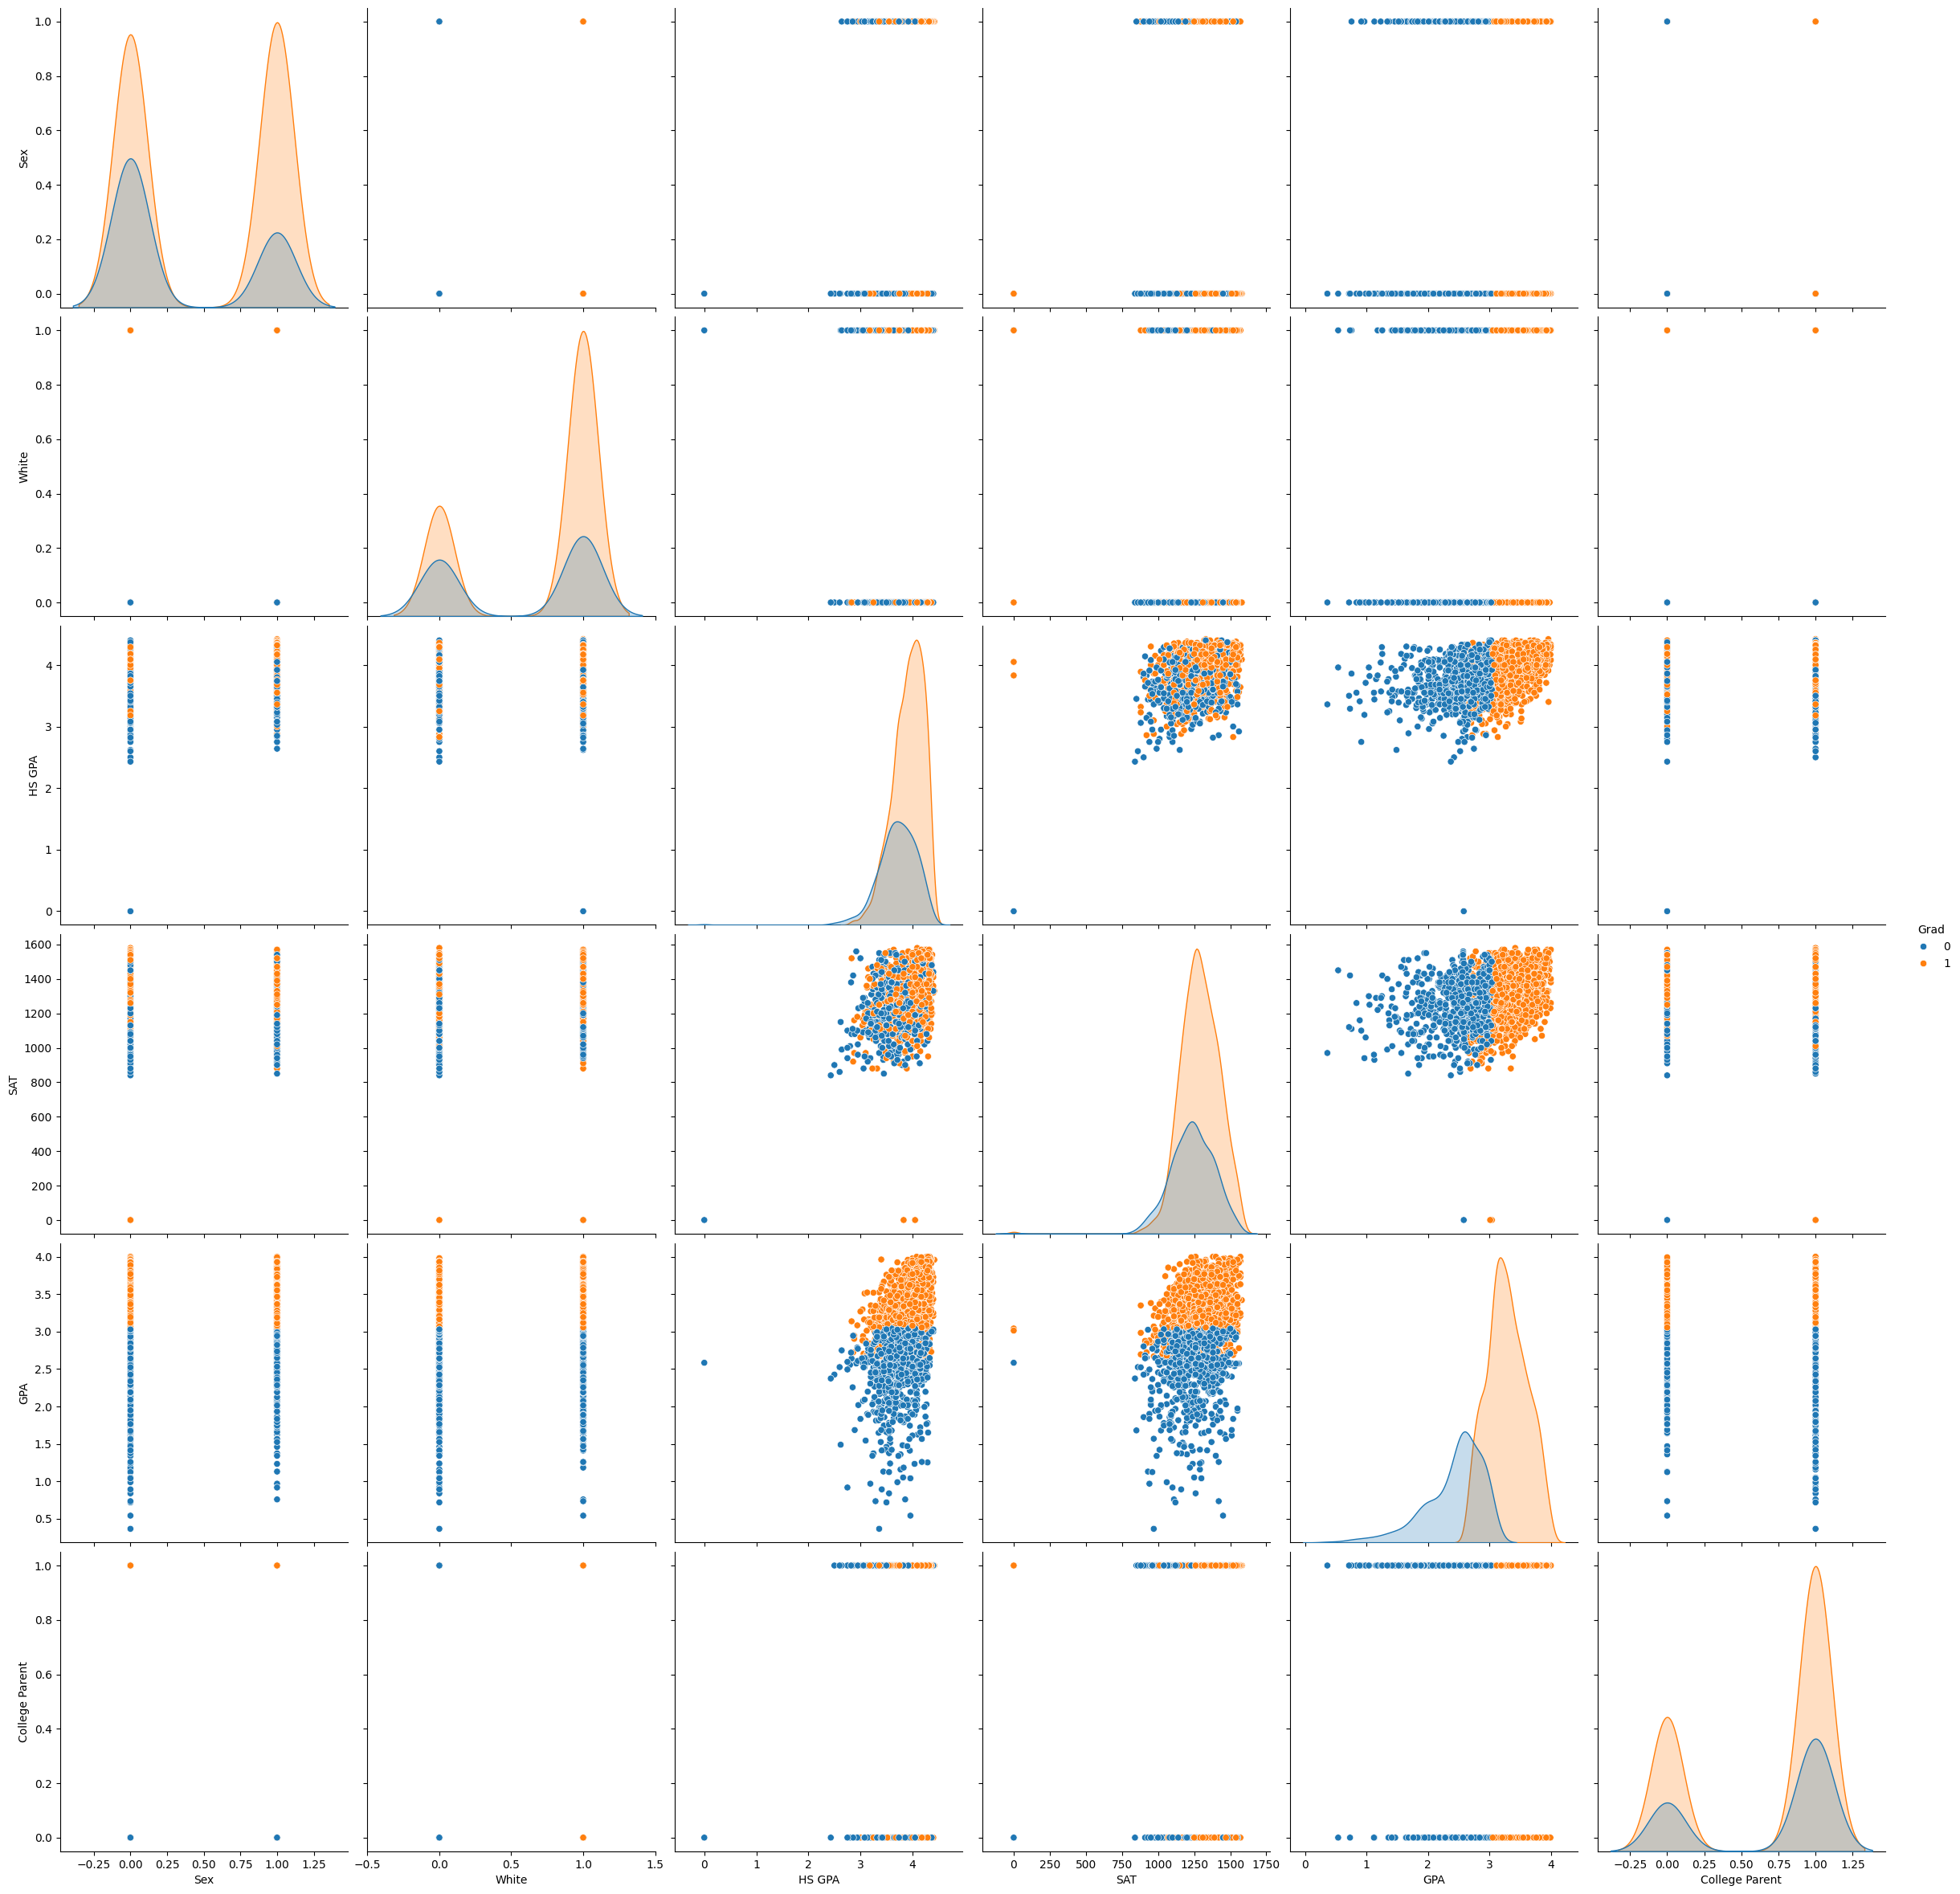

In [ ]:
sns.pairplot(XDB, hue='Grad', size=4, vars=['Sex', 'White', 'HS GPA', 'SAT', 'GPA', 'College Parent'])

#Para confirmar la buena correlación
corr= XDB.corr()
print("Esta es la matriz de correlación:\n", corr)

#Se procede con los datos de entrada y salida
XD_ks= np.array(XDB.iloc[:,0:6])
yd_ks= np.array(XDB.iloc[:,6])

3.2 Implementación KNN

Esta es la matriz de confusión:
 [[ 387  229]
 [  74 1310]]
Exactitud: 0.8485
Sensibilidad: 0.9465317919075145
Especificidad: 0.6282467532467533


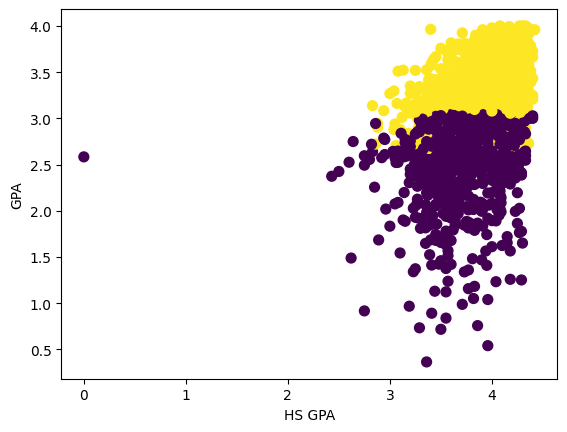

In [ ]:
mknn= KNeighborsClassifier(n_neighbors=10)
mknn.fit(XD_ks, yd_ks)

#Evaluamos el funcionamiento del modelo
ydp_ks= mknn.predict(XD_ks)

#Matriz de Confusión
from sklearn.metrics import confusion_matrix
cm_ks= confusion_matrix(yd_ks, ydp_ks)
print("Esta es la matriz de confusión:\n", cm_ks)

VN_ks= cm_ks[0,0]; FP_ks= cm_ks[0,1]; FN_ks= cm_ks[1,0]; VP_ks= cm_ks[1,1]
Ex_ks=(VP_ks+VN_ks)/(VP_ks+VN_ks+FP_ks+FN_ks)
Se_ks= VP_ks/(VP_ks+FN_ks)
Es_ks= VN_ks/(VN_ks+FP_ks)
print("Exactitud:", Ex_ks)
print("Sensibilidad:", Se_ks)
print("Especificidad:", Es_ks)

plt.scatter(XD_ks[:,2], XD_ks[:,4], c=yd_ks, s=50, cmap='viridis')
plt.xlabel('HS GPA'); plt.ylabel('GPA')
plt.show()

3.3 Construcción de K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Donde quedó la primera persona 2
Donde quedó la segunda persona 3
Donde quedó la tercera persona 0


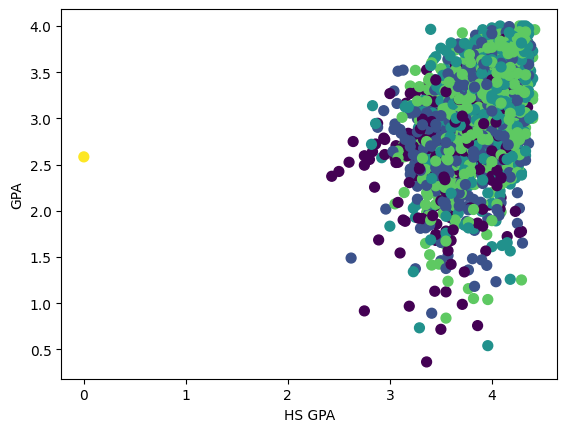

Las características de cada cluster son:
 [[5.91078067e-01 4.64684015e-01 3.63951673e+00 1.05312268e+03
  2.70508550e+00 7.32342007e-01]
 [5.30685921e-01 6.40794224e-01 3.80368231e+00 1.19072202e+03
  2.97076354e+00 6.85920578e-01]
 [3.17622951e-01 7.72540984e-01 3.96206967e+00 1.44682377e+03
  3.16286475e+00 6.59836066e-01]
 [4.44606414e-01 7.28862974e-01 3.90004373e+00 1.30469388e+03
  3.09267201e+00 6.85131195e-01]
 [5.55111512e-17 6.66666667e-01 2.62666667e+00 2.27373675e-13
  2.87900000e+00 6.66666667e-01]]
Porcentaje de NoGrads del Cluster 0: 0.5130111524163569
Porcentaje de Grads del Cluster 0: 0.48698884758364314
Porcentaje de NoGrads del Cluster 1: 0.3303249097472924
Porcentaje de Grads del Cluster 1: 0.6696750902527075
Porcentaje de NoGrads del Cluster 2: 0.24180327868852458
Porcentaje de Grads del Cluster 2: 0.7581967213114754
Porcentaje de NoGrads del Cluster 3: 0.2565597667638484
Porcentaje de Grads del Cluster 3: 0.7434402332361516
Porcentaje de NoGrads del Cluster 4: 0.3

In [ ]:
np.random.seed(42)

mkm= KMeans(n_clusters=5, init='random', random_state=42)
mkm.fit(XD_ks, yd_ks)
labels= mkm.labels_
print("Donde quedó la primera persona", labels[0,])
print("Donde quedó la segunda persona", labels[1,])
print("Donde quedó la tercera persona", labels[2,])

plt.scatter(XD_ks[:,2], XD_ks[:,4], c=labels, s=50, cmap='viridis')
plt.xlabel('HS GPA'); plt.ylabel('GPA')
plt.show()

clusters= mkm.cluster_centers_
print("Las características de cada cluster son:\n", clusters)

#Cluster 0
c00= len(np.where((labels==0) & (yd_ks==0)) [0])
c01= len(np.where((labels==0) & (yd_ks==1)) [0])
print("Porcentaje de NoGrads del Cluster 0:", c00/(c00+c01))
print("Porcentaje de Grads del Cluster 0:", c01/(c00+c01))

#Cluster 1
c10= len(np.where((labels==1) & (yd_ks==0)) [0])
c11= len(np.where((labels==1) & (yd_ks==1)) [0])
print("Porcentaje de NoGrads del Cluster 1:", c10/(c10+c11))
print("Porcentaje de Grads del Cluster 1:", c11/(c10+c11))

#Cluster 2
c20= len(np.where((labels==2) & (yd_ks==0)) [0])
c21= len(np.where((labels==2) & (yd_ks==1)) [0])
print("Porcentaje de NoGrads del Cluster 2:", c20/(c20+c21))
print("Porcentaje de Grads del Cluster 2:", c21/(c20+c21))

#Cluster 3
c30= len(np.where((labels==3) & (yd_ks==0)) [0])
c31= len(np.where((labels==3) & (yd_ks==1)) [0])
print("Porcentaje de NoGrads del Cluster 3:", c30/(c30+c31))
print("Porcentaje de Grads del Cluster 3:", c31/(c30+c31))

#Cluster 4
c40= len(np.where((labels==4) & (yd_ks==0)) [0])
c41= len(np.where((labels==4) & (yd_ks==1)) [0])
print("Porcentaje de NoGrads del Cluster 4:", c40/(c40+c41))
print("Porcentaje de Grads del Cluster 4:", c41/(c40+c41))

3.4 Pronóstico nuevas personas

   Sex  White  HS GPA   SAT    GPA  College Parent
0    1      1    4.00  1260  1.900               1
1    1      1    2.91  1090  2.719               1
2    0      0    3.58  1210  3.319               1
Las personas quedaron en el cluster: [3 0 1]
Las personas se van a graduar o no: [0 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


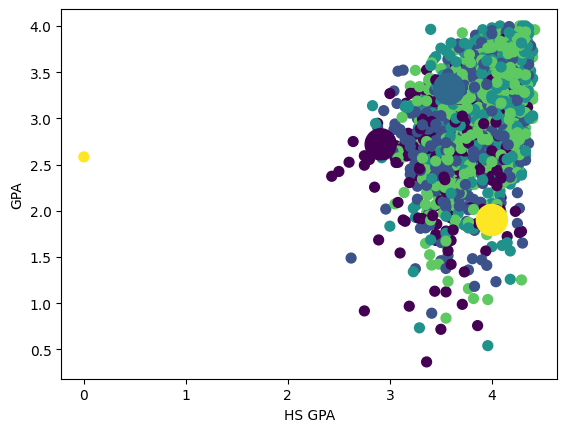

In [ ]:
XDB_ks= pd.read_excel(nxl, sheet_name=1)
XDB_ks= XDB_ks.dropna()
XDB_ks['Sex']= XDB_ks['Sex'].map({'F':1, 'M':0})
print(XDB_ks)

ydp_ks2= mkm.predict(XDB_ks)
print("Las personas quedaron en el cluster:", ydp_ks2)

ydp_ks3= mknn.predict(XDB_ks)
print("Las personas se van a graduar o no:", ydp_ks3)


#Gráfico
XDB_ks2= np.array(XDB_ks)
plt.scatter(XD_ks[:,2], XD_ks[:,4], c=labels, s=50, cmap='viridis')
plt.scatter(XDB_ks2[:,2], XDB_ks2[:,4], c=ydp_ks2, s=500, facecolors='orange')
plt.xlabel('HS GPA'); plt.ylabel('GPA')
plt.show()

**Análisis de Resultados**
Gracias a la caracterización de variables aleatorias y teniendo en cuenta que la variable de salida es 'Grad', podemos determinar que las variables que tienen mayor correlación son 'HS GPA' & 'GPA' con 0,3769; y estas serán las utilizadas para la graficación de datos ya que siempre se hacen con las variables que presenten una mayor correlación.

De acuerdo con el modelo **Naive Bayes** podemos determinar que: El grupo que logró mayor clasificación en 'HS GPA' & 'GPA' fueron los graduados [1]. Este resultado resulta confiable ya que el modelo presentó una exactitud de 88,3% una sensibilidad de 94,7% y una especifidad de 73,86% lo cual lo convierte en un modelo con un muy buen desempeño. Los individuos de la hoja 2 hacen parte de las categorías [0 0 1], lo que quiere decir que 2 no se graduarán y 1 sí.

De acuerdo con el modelo **Árboles de Decisión** podemos determinar que: Es un modelo muy confiable ya que su exactitud es de 90,2%; su sensibilidad es 99,8% y su especificidad es 68,5%. Encontramos 3 nodos puros [413, 0] donde la regla es tener un GPA<=2,653; [0, 1075] donde la regla es tener un GPA>3,041; [3, 0] donde la regla es tener un GPA<=3,041 y un HS GPA>4,365. En la segunda hoja, el primer individuo pertenece al nodo puro [413, 0]; el segundo individuo pertenece al nodo [194, 307]; el tercer individuo pertenece al nodo puro [0, 1075].

De acuerdo al modelo **KNN-KMeans** podemos determinar que: Los clusters que lograron la mayor calificación en 'HS GPA' & 'GPA' fueron el 2 y el 1. El modelo cuenta con una exactitud de 84,6%; una sensibilidad de 94,6% y una especificidad de 62,8% lo cual lo hace un muy buen modelo. El clúster que contiene la mayor cantidad de personas a graduarse es el 3 (510 personas), con un porcentaje de 74,3%. Los estudiantes de la última hoja pertenecen a los clústers 3,0, y 1 respectivamente.